##***LetsGrowMore***
**Data Science Internship**

**Name: Shraddha Narvekar**

#Developing a Neural Network that can read Handwriting
Using MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN.

We will be spliting the dataset into training and testing sets. Using the training set to train the network and the testing set to evaluate its performance.




##Importing Libraries

In [27]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

#Loading the MNIST data set for use
The MNIST Dataset is conatined in the Tensorflow library and can be loaded using Keras. The dataset is then further divided into the training and test sets

In [28]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

##Visualization of Dataset

In [29]:
X_train.shape

(60000, 28, 28)

In [30]:
#This shows that the training dataset contains 60,000 images where each is 28x28 pixel greyscale image.

In [31]:
Y_train.shape

(60000,)

In [32]:
X_test.shape

(10000, 28, 28)

In [33]:
#The training dataset contains 10,000 images where each is 28x28 pixel greyscale image.

##Checking the values of each pixel before normalization process

In [34]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

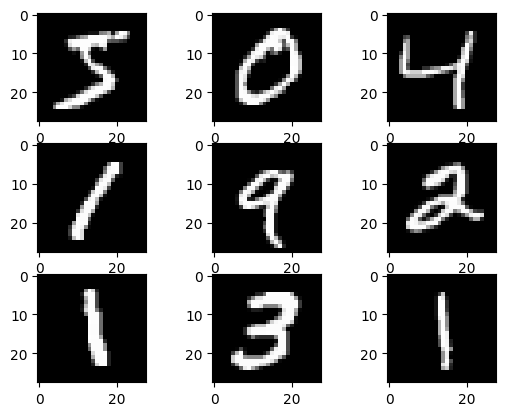

In [35]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

##Reshape the data

In [36]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

##Normalizing the data

In [37]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

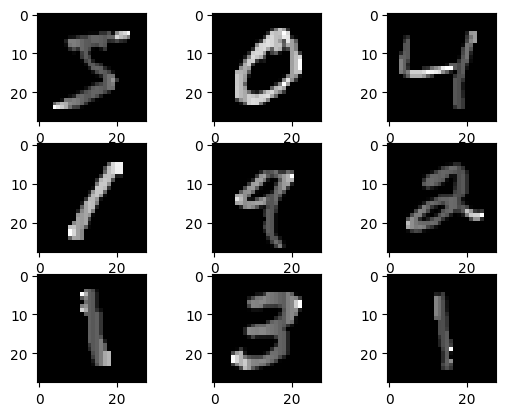

In [38]:
#Visualising the data after normalization
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

##Creating a basic CNN Model

In [39]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


In [40]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [41]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1844 - accuracy: 0.9432
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0690 - accuracy: 0.9791
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0539 - accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0354 - accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.0314 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0281 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0251 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0236 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 52s 28m

##Summary of the CNN Model

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

##Plotting the CNN Model

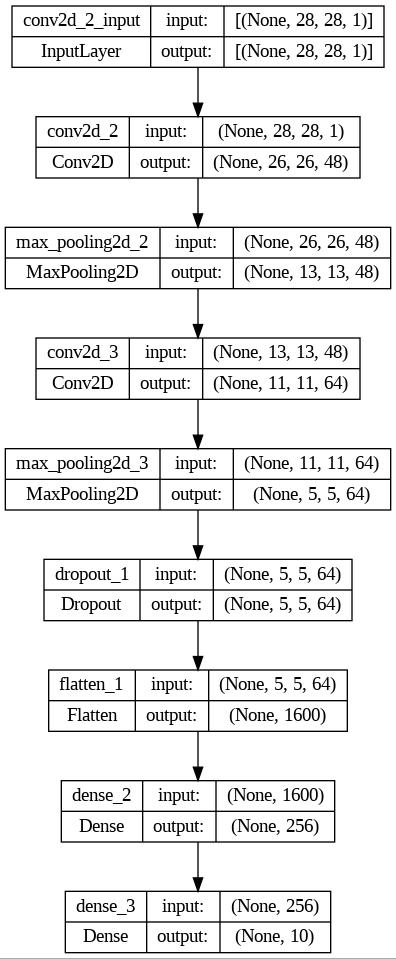

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

##Evaluating the model based on validation loss and validation accuracy

In [44]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 3s 11ms/step - loss: 35.4687 - accuracy: 0.9678
Validation loss :  3546.866989135742 %
Validation accuracy :  96.78000211715698 %


##Saving the model

In [45]:
model.save('/content/drive/MyDrive/Read_Handwriting/mnist_model')

##Predicting a random test case

In [46]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Read_Handwriting/mnist_model")

In [47]:
predictions = new_model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


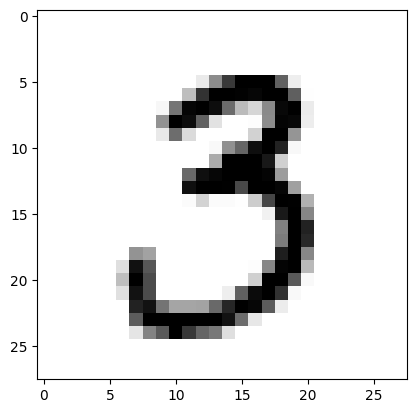

In [48]:
plt.imshow(X_test[90], cmap = plt.get_cmap('binary'))

In [49]:
print("The prediction is : ", np.argmax(predictions[90]))

The prediction is :  3


#Thank You!